# Laptop Price Prediction

In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [43]:
df = pd.read_csv('laptopPrice.csv')

In [44]:
df.shape

(823, 19)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [46]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [47]:
df.tail()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0
822,Lenovo,AMD,Ryzen 5,10th,8 GB,DDR4,512 GB,0 GB,DOS,64-bit,0 GB,ThinNlight,No warranty,No,No,57490,4 stars,18,4


# Feature Engineering

In [48]:
df.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [49]:
print(df['ram_gb'].unique())
print(df['ssd'].unique())
print(df['hdd'].unique())
print(df['os_bit'].unique())

['4 GB' '8 GB' '16 GB' '32 GB']
['0 GB' '512 GB' '256 GB' '128 GB' '1024 GB' '2048 GB' '3072 GB']
['1024 GB' '0 GB' '512 GB' '2048 GB']
['64-bit' '32-bit']


In [50]:
df['ram_gb'] = df['ram_gb'].str.replace('32 GB','16 GB').str.replace('GB','')
df['ram_gb'] = df['ram_gb'].astype('int')

In [51]:
replace_dict = {'128 GB': '1024 GB', '2048 GB': '1024 GB','3072 GB':'1024 GB'}
df['ssd'].replace(replace_dict, inplace=True)
df['ssd'] = df['ssd'].str.replace('GB','')
df['ssd'] = df['ssd'].astype(int)

In [52]:
replace_dict = {'2048 GB': '1024 GB', '512 GB': '1024 GB', 'GB': ''}
df['hdd'].replace(replace_dict, inplace=True)
df['hdd'] = df['hdd'].str.replace('GB','')
df['hdd'] = df['hdd'].astype(int)

In [53]:
df['os_bit'] = df['os_bit'].str.replace('-bit', '')
df['os_bit'] = df['os_bit'].astype(int)

In [54]:
replace_dict = {'2 GB': '4 GB', '6 GB':'4 GB', '8 GB': '4 GB'}
df['graphic_card_gb'] = df['graphic_card_gb'].str.replace('GB','')
df['graphic_card_gb'].replace(replace_dict, inplace=True)
df['graphic_card_gb'] = df['graphic_card_gb'].astype(int)

In [55]:
df.drop(['warranty','msoffice','rating','Number of Ratings','Number of Reviews'],axis=1,inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            823 non-null    object
 1   processor_brand  823 non-null    object
 2   processor_name   823 non-null    object
 3   processor_gnrtn  823 non-null    object
 4   ram_gb           823 non-null    int32 
 5   ram_type         823 non-null    object
 6   ssd              823 non-null    int32 
 7   hdd              823 non-null    int32 
 8   os               823 non-null    object
 9   os_bit           823 non-null    int32 
 10  graphic_card_gb  823 non-null    int32 
 11  weight           823 non-null    object
 12  Touchscreen      823 non-null    object
 13  Price            823 non-null    int64 
dtypes: int32(5), int64(1), object(8)
memory usage: 74.1+ KB


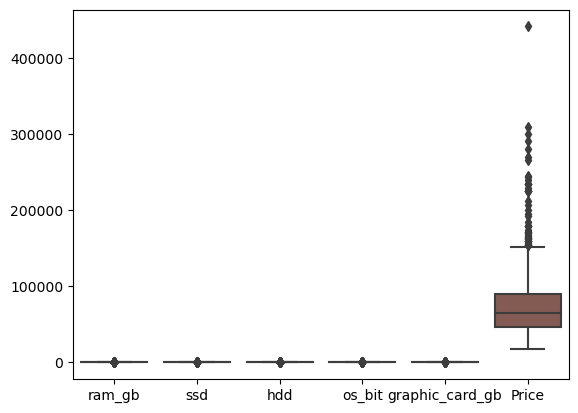

In [57]:
sns.boxplot(data=df)
plt.show()

In [58]:
replace_dict = {'acer': 'Other', 'MSI': 'Other', 'APPLE': 'Other','Avita':'Other'}
df['brand'].replace(replace_dict, inplace=True)

In [59]:
df['processor_brand'] = df['processor_brand'].str.replace('M1', 'AMD')

In [60]:
replace_dict = {'Core i9': 'Other', 'Pentium Quad': 'Other', 'M1': 'Other','Celeron Dual':'Other','Ryzen 9':'Other','Ryzen 3':'Ryzen 7'}
df['processor_name'].replace(replace_dict, inplace=True)

In [61]:
replace_dict = {'4th': 'Other', '12th': 'Other', '9th': 'Other','7th':'Other','8th':'Other','Not Available':'Other'}
df['processor_gnrtn'].replace(replace_dict, inplace=True)

In [62]:
replace_dict = {'LPDDR4X': 'Other', 'LPDDR4': 'Other', 'LPDDR3': 'Other','DDR5':'Other','DDR3':'Other'}
df['ram_type'].replace(replace_dict, inplace=True)

In [63]:
replace_dict = {'Mac': 'Other', 'DOS': 'Other'}
df['os'].replace(replace_dict, inplace=True)

In [64]:
replace_dict = {'Gaming': 'ThinNlight'}
df['weight'].replace(replace_dict, inplace=True)

In [65]:
df.sample(5)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,Touchscreen,Price
121,ASUS,Intel,Core i3,11th,4,DDR4,512,0,Windows,64,0,Casual,No,44890
479,Other,Intel,Core i7,Other,8,DDR4,256,0,Windows,64,0,ThinNlight,No,73990
813,ASUS,AMD,Other,Other,4,DDR4,1024,0,Windows,64,4,Casual,No,162990
123,HP,Intel,Core i3,11th,4,DDR4,512,0,Windows,32,0,ThinNlight,No,50990
368,ASUS,Intel,Core i5,11th,8,Other,512,0,Windows,64,0,Casual,Yes,114990


In [66]:
df= df[df['Price'] <= 400000]

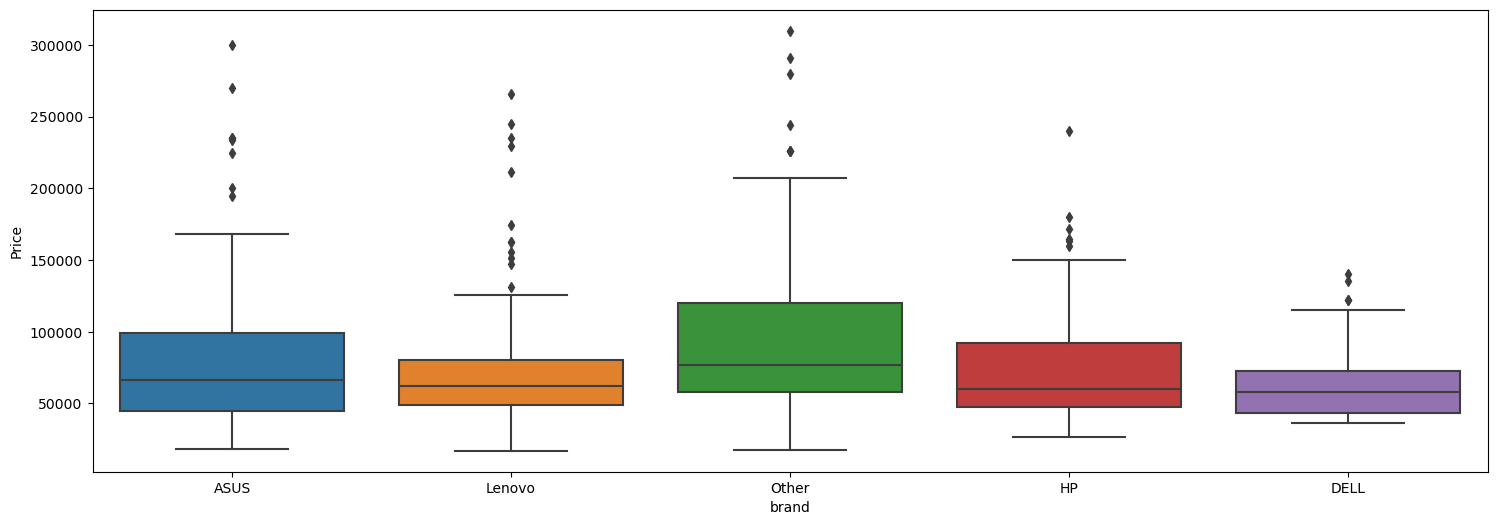

In [67]:
plt.figure(figsize=(18,6))
sns.boxplot(x=df['brand'],y=df['Price'],data=df)
plt.show()

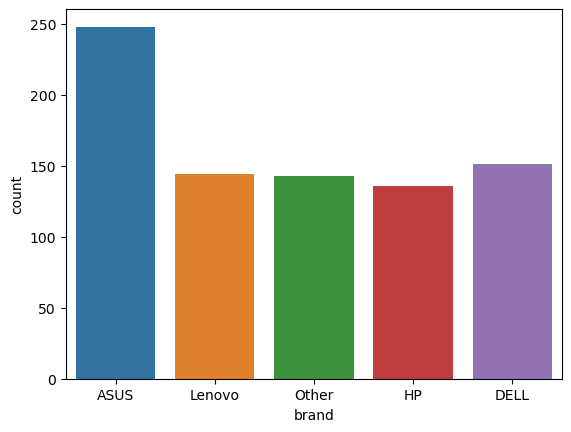

In [68]:
sns.countplot(x=df['brand'],data=df)
plt.show()

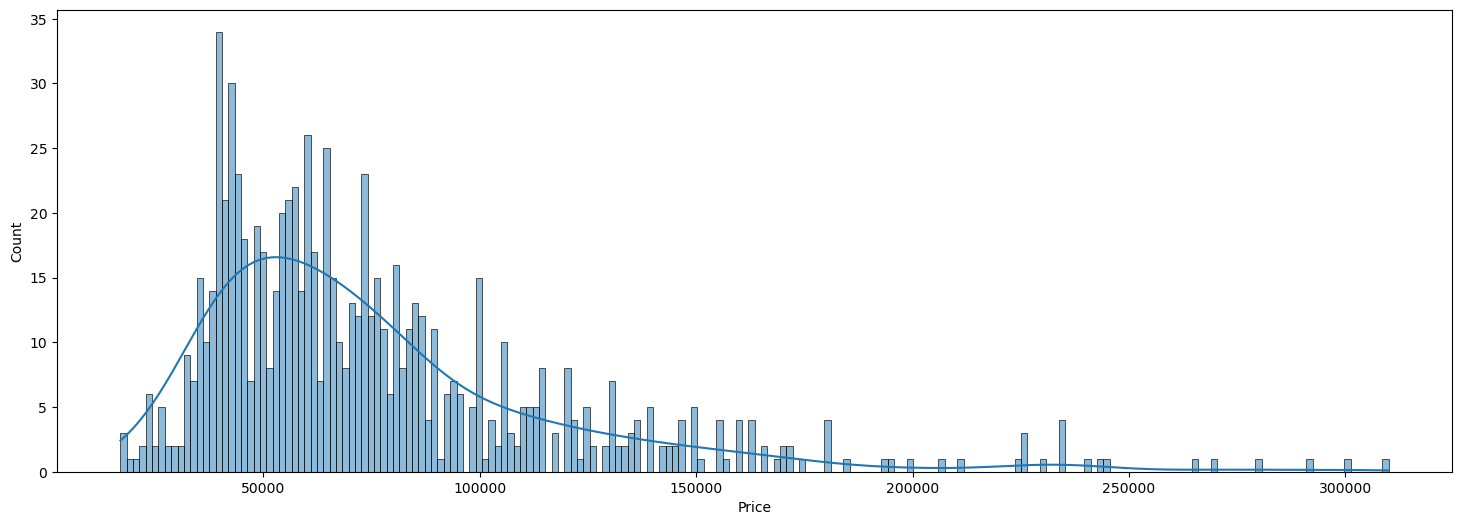

In [69]:
plt.figure(figsize=(18,6))
sns.histplot(x=df['Price'],bins=200,data=df,kde=True)
plt.show()

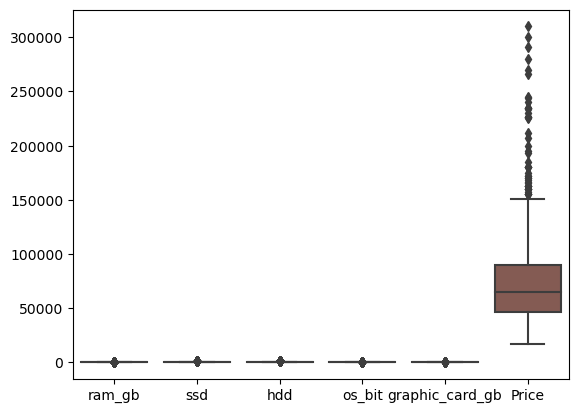

In [70]:
sns.boxplot(data=df)
plt.show()

In [71]:
X=df.drop('Price', axis=1)
Y=df['Price']

In [72]:
from sklearn.preprocessing import StandardScaler
target_col_name='Price'
col_for_scaled=[]
all_col_nm=X.select_dtypes(include=['int64','int32','float64','float32']).columns.tolist()

for i in range(len(all_col_nm)):
    xx=list(X[all_col_nm[i]].unique())
    
    if max(xx)>2:
        if all_col_nm[i]==target_col_name:
            pass
        else:
            col_for_scaled.append(all_col_nm[i])
    else:
        pass
    
x_cols_for_scale=X[col_for_scaled]
scaler = StandardScaler()
scaler.fit(x_cols_for_scale)


x_transform_dt = scaler.transform(x_cols_for_scale)
x_scaled_df = pd.DataFrame(x_transform_dt, columns=col_for_scaled)
X.drop(col_for_scaled,axis=1,inplace=True)
X.reset_index(drop=True, inplace=True)
x_scaled_df.reset_index(drop=True, inplace=True)
X=pd.concat([X, x_scaled_df], axis=1)
X.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_type,os,weight,Touchscreen,ram_gb,ssd,hdd,os_bit,graphic_card_gb
0,ASUS,Intel,Core i3,10th,DDR4,Windows,Casual,No,-1.096256,-1.521799,1.751944,0.388922,-0.586609
1,Lenovo,Intel,Core i3,10th,DDR4,Windows,Casual,No,-1.096256,-1.521799,1.751944,0.388922,-0.586609
2,Lenovo,Intel,Core i3,10th,DDR4,Windows,Casual,No,-1.096256,-1.521799,1.751944,0.388922,-0.586609
3,ASUS,Intel,Core i5,10th,DDR4,Windows,Casual,No,-0.149699,0.210775,-0.570795,-2.571208,0.403519
4,ASUS,Intel,Other,Other,DDR4,Windows,Casual,No,-1.096256,-1.521799,1.751944,0.388922,-0.586609


In [73]:
from sklearn.preprocessing import LabelEncoder
encoding=LabelEncoder()
X["processor_brand"]=encoding.fit_transform(X["processor_brand"])
X["processor_gnrtn"]=encoding.fit_transform(X["processor_gnrtn"])
X["ram_type"]=encoding.fit_transform(X["ram_type"])
X["os"]=encoding.fit_transform(X["os"])
X["weight"]=encoding.fit_transform(X["weight"])
X["Touchscreen"]=encoding.fit_transform(X["Touchscreen"])

In [74]:
from sklearn.preprocessing import OneHotEncoder
numerical_cols = X.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the categorical columns
encoded_categorical = encoder.fit_transform(X[categorical_cols])

# Create DataFrame with the encoded categorical columns
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

# Combine encoded categorical columns with numerical columns
X = pd.concat([X[numerical_cols], encoded_df], axis=1)

C:\Users\khali\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Model Selection and Training

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=1232224)

In [76]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [77]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lrtd=lr.predict(x_test)
lrr2=r2_score(y_test,lrtd)
lrr2

0.7211462194564648

In [78]:
from sklearn.svm import SVR as supportVectorRegressor
svr=supportVectorRegressor() 
svr.fit(x_train,y_train)
svrtd=svr.predict(x_test)
svrr2=r2_score(y_test,svrtd)
svrr2

-0.07154831954920104

In [79]:
from xgboost import XGBRegressor as xGBRegressor
xgb = xGBRegressor() 
xgb.fit(x_train,y_train)
xgbtd=xgb.predict(x_test)
xgbr2=r2_score(y_test,xgbtd)
xgbr2

0.6373952738343241

In [80]:
from sklearn.ensemble import RandomForestRegressor as randomForestRegressor 
rfr=randomForestRegressor() 
rfr.fit(x_train,y_train)
rfrtd=rfr.predict(x_test)
rfrr2=r2_score(y_test,rfrtd)
rfrr2

0.6546792623730142

In [81]:
from sklearn.neighbors import KNeighborsRegressor as kNeighborsRegressor
knn=kNeighborsRegressor() 
knn.fit(x_train,y_train)
knntd=knn.predict(x_test)
knnr2=r2_score(y_test,knntd)
knnr2

0.7470981437222945

Mean Squared Error (MSE): 1884036891.6820107
Root Mean Squared Error (RMSE): 43405.49379608543
Mean Absolute Error (MAE): 28495.757765962037
R-squared (R2) Score: -0.07154831954920104
1884036891.6820107


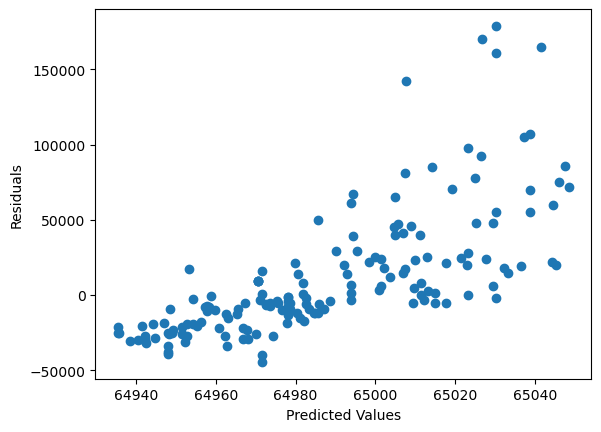

In [82]:
y_pred = svr.predict(x_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)





# calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
print(mse)

#********** Plot the residuals *************\n")
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

### Since K-Nearest Neighbor Regressor provides 100% accuracy, we utilize it for deployment.